# Project OCO
December, 2020

*Alya Ben Abdallah & Badis Jaouani*

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

# 0. Preliminaries

### 0.1. Data Preprocessing

In [2]:
train = pd.read_csv('mnist_train.csv', header = None)
test = pd.read_csv('mnist_test.csv', header = None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [5]:
train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 0.1.1. Check for missing values

In [6]:
def missing(df):
    miss = (df.isnull().count() - df.count()).sort_values(ascending = False)
    perc = miss / df.isnull().count()
    data_missing = pd.concat([miss, perc], axis = 1, keys = ['total', 'percentage'])
    print(data_missing[data_missing.percentage>0], '\n')

In [7]:
missing(train)
missing(test)

Empty DataFrame
Columns: [total, percentage]
Index: [] 

Empty DataFrame
Columns: [total, percentage]
Index: [] 



#### 0.1.2. Define train and test sets and scale the data

In [8]:
X_train = train.loc[:,1:]
y_train = train.loc[:,0]

In [9]:
X_test = test.loc[:,1:]
y_test = test.loc[:,0]

In [10]:
# Scaling 
X_train /= 255
X_test /= 255

In [11]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [12]:
# Data shapes
n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X_train.shape[1]

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


#### 0.1.3. Consider the binary classification problem 0 vs. other digits

In [13]:
for i in range(n_train):
    if y_train[i] == 0: y_train[i] = 1
    else: y_train[i] = -1

for i in range(n_test):
    if y_test[i] == 0: y_test[i] = 1
    else: y_test[i] = -1

### 0.2 Hinge Loss and its Gradient

In [14]:
def hinge_loss(x, a, b, lamda):
    'a: data matrix'
    'b: labels'
    cost = 1 - b * (a.dot(x)) 
    cost[cost < 0] = 0
    loss = np.mean(cost) 
    return loss + lamda/2 * np.linalg.norm(x)**2

In [15]:
def gradient(x, a, b, lamda):
    'The corresponding gradient'
    'Same parameters'
    thd = b * (a.dot(x))
    gd = - b.reshape(-1,1) * a
    gd[thd > 1] = 0
    return gd.mean() + lamda * x

In [16]:
def inst_gradient(x, a, b, lamda):
    'Gradient at iteration t'
    'Calculated only with one observation'
    thd = b * (a.dot(x))
    gd = - b * a
    gd[thd > 1] = 0
    return gd + lamda * x

# 1. Gradient Descent

We start by implementing deterministic Gradient Descent and evaluate its performance. In what follows, the classic GD is implemented. 

### 1.1 Algorithm

In [17]:
def gradient_descent(a, b , cost, grad, lamda, eta, n_iters):
    x = np.ones(a.shape[1])
    gradi = grad(x, a, b, lamda)
    cost_values, x_iter = [], np.zeros((a.shape[1], n_iters))
    x_iter[:,0] = x
    
    for t in range(1,n_iters):
        eta /= t
        #eta = np.sqrt(t)
        x -= 0.1 * gradi
        gradi = grad(x, a, b, lamda)
        cost_values.append(cost(x,a,b,lamda))
        x_iter[:,t] = x
        
    return cost_values, x_iter, x

In [18]:
cost_gd, x_iter_gd, x_gd = gradient_descent(X_train, y_train, 
                                           hinge_loss, gradient, 
                                           0.01, 0.01, 
                                           n_iters = 500)

In [20]:
liss = []
iterations = np.arange(0,500)
for i in iterations:
    tstt = y_test * (X_test.dot(x_iter_gd[:,i]))
    liss.append(tstt[tstt>0].shape[0]/y_test.shape[0])

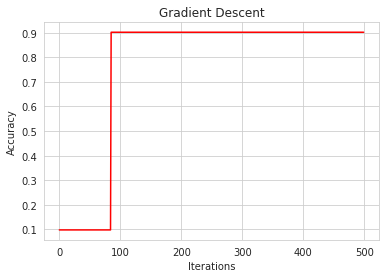

In [21]:
plt.plot(iterations, liss, color = 'red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Gradient Descent');

The starting point $x_0$ is not crucial here, since we consider a convex (or even a strongly convex) loss function. We have theoretical results showing that GD algorithm converges when the objective function is convex. 

However one must highlight the high computational time of GD in its deterministic version. In what follows, we discuss the effect of the regularization parameter $\lambda$.

### 1.2 Effect of regularization parameter $\lambda$

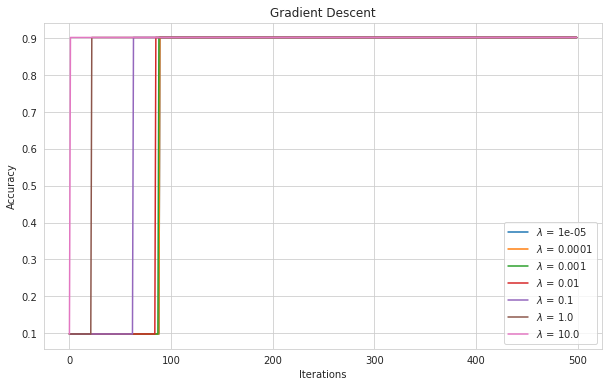

In [22]:
lamda = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
plt.figure(figsize = (10,6))
for reg in lamda:
    cost_gd, x_iter_gd, x_gd = gradient_descent(X_train, y_train, 
                                           hinge_loss, gradient, 
                                           reg, 0.01, 
                                           n_iters = 500)
    liss = []
    iterations = np.arange(0,500)
    for i in iterations:
        tstt = y_test * (X_test.dot(x_iter_gd[:,i]))
        liss.append(tstt[tstt>0].shape[0]/y_test.shape[0])
    
    plt.plot(iterations, liss, label = r'$\lambda$ = {}'.format(reg))
    plt.legend(loc = 'best')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Gradient Descent');

As seen above, accurate solutions are obtained faster for bigger regularization parameters. While $\lambda$ offers computational stability, it may affect the objective functions and thus may result in minimizing a biased loss. \\

Once again, note that running time is huge for this algorithm, which motivates the use of stochastic versions. 

In what follows, a projection step, into the $l^1$ ball is considered, adding a new hyperparameter which is the ball's radius.

# 2. Projected Gradient Descent

This algorithm uses the $l^1$ projection, which can be obtained by projecting $\mid x \mid$ into the simplex $\Lambda$, and then multiplying by the sign of $x$. These steps are detailed below. 

### 2.1 Projection on the simplex $\Lambda$

In [23]:
def proj_lambda(x,z):
    if x.sum() == z: return x
    else:
        n = x.shape[0]
        x = sorted(x, reverse = True)

    s = np.cumsum(x) - z
    idx = np.arange(n) + 1
    cond = x - s/idx > 0

    n0 = idx[cond][-1]
    theta = s[cond][-1] / n0
    proj = np.maximum(x - theta, 0)
    return proj

#### 2.1.1 Example

In [24]:
kk = proj_lambda(np.random.normal(loc = 97, size = 5), 1)
print(kk)

[0.84802821 0.08549546 0.06647633 0.         0.        ]


### 2.2 Projection on the $l_1$ ball

In [25]:
def projection_l1(x,z):
    if np.sum(np.abs(x)) <= z: return x
    else:
        x_proj = proj_lambda(np.abs(x), z)
    return np.sign(x) * x_proj

### 2.3 Projected Gradient Descent (PGD) on the $l_1$ ball

Once the projection step is complete, the PGD algorithm can be implemented.

#### 2.3.1 Algorithm

In [26]:
def proj_gradient_descent(a, b , cost, grad, lamda, z, eta, n_iters):
    x = np.random.uniform(1,2,a.shape[1])
    gradi = grad(x, a, b, lamda)
    cost_values, x_iter = [], np.zeros((a.shape[1], n_iters))
    x_iter[:,0] = x
    
    for t in range(1,n_iters):
        eta /= t
        #eta = np.sqrt(t)
        x -= eta * gradi
        x = projection_l1(x,z)
        gradi = grad(x, a, b, lamda)
        cost_values.append(cost(x,a,b,lamda))
        x_iter[:,t] = x
        
    return cost_values, x_iter, x

In [27]:
cost_pgd, x_pgd_iter, x_pgd = proj_gradient_descent(X_train, y_train, 
                                                    hinge_loss, gradient, 
                                                    0.01, 1, 
                                                    0.01, 
                                                    n_iters = 500)

In [28]:
liss = []
iterations = np.arange(0,200)
for i in iterations:
    tstt = y_test * (X_test.dot(x_pgd_iter[:,i]))
    liss.append(tstt[tstt>0].shape[0]/y_test.shape[0])

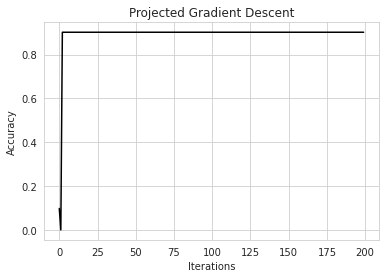

In [29]:
plt.plot(iterations, liss, color = 'black')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Projected Gradient Descent');

#### 2.3.2 Effect of the $l^1$ball radius

We now discuss the effect of the projection ball on the convergence. 

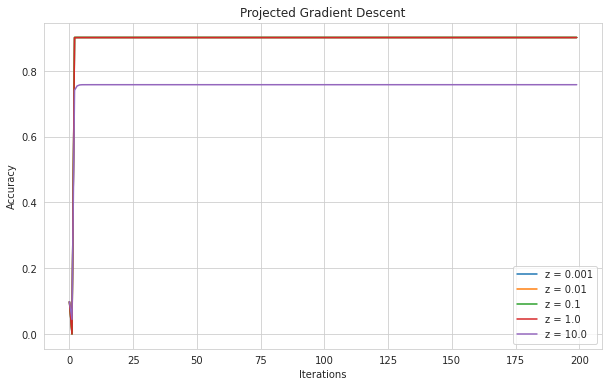

In [30]:
radius = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
plt.figure(figsize = (10,6))
for z in radius:
    cost_pgd, x_pgd_iter, x_pgd = proj_gradient_descent(X_train, y_train, 
                                                        hinge_loss, gradient, 
                                                        0.01, z, 
                                                        0.01, 
                                                        n_iters = 200)
    liss = []
    iterations = np.arange(0,200)
    for i in iterations:
        tstt = y_test * (X_test.dot(x_pgd_iter[:,i]))
        liss.append(tstt[tstt>0].shape[0]/y_test.shape[0])
    

    plt.plot(iterations, liss, label = 'z = {}'.format(z))
    plt.legend(loc = 'best')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Projected Gradient Descent');

Accuracy decreases when the radius of the projection z is very big. Radiuses in the range $[0.001,1]$ seem to work well.

Here also, running time is very high. In what follows, we introduce Stochastic Gradient Descent (SGD) and compare the performance and the running time with non-stochastic GD.

# 3. Stochastic Gradient Descent

### 3.1 Stochastic Gradient Descent (SGD)

The most basic stochastic algorithm is the Stochastic Gradient Descent. Only one coordinate is used to update the gradient, allowing much lower computational time. As it will be seen, SGD does as well as, and even better than the deterministic GD. 


In [31]:
def stoch_gradient_descent(a, b , cost, grad, epoch, lamda, eta):
    'epoch = T: number of iterations'
    'eta = 1 / (lamda*t)'

    x = np.ones(a.shape[1])
    idx = np.random.randint(0, a.shape[0], epoch)   # Sample uniformly
    a = a[idx,:]
    b = b[idx] 
    x_iter = np.zeros((a.shape[1], epoch+1))
    for t in range(1,epoch):
        eta = 1 / (lamda * t)
        x -= eta * grad(x, a[t,:], b[t], lamda)
        x_iter[:,t] = x
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f

In [32]:
x_iter_sgd, x_sgd = stoch_gradient_descent(X_train, y_train, hinge_loss, inst_gradient, 5000, 0.001, 0.01)

In [33]:
liss_sgd = []
iterations_sgd = np.arange(0,5000, 10)
for i in iterations_sgd:
    tstt_sgd = y_test * (X_test.dot(x_iter_sgd[:,i]))
    liss_sgd.append(tstt_sgd[tstt_sgd>0].shape[0]/y_test.shape[0])

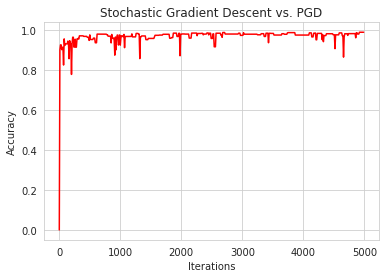

In [34]:
plt.plot(iterations_sgd[:500], liss_sgd[:500], color = 'red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Stochastic Gradient Descent vs. PGD');

We notice the noisy character of SGD. Next, we add an $l^1$ projection step and compare to the projected GD.

### 3.2 Projected Stochastic Gradient Descent (PSGD)

In [35]:
def proj_stoch_gradient_descent(a, b , cost, grad, epoch, lamda, eta, z):
    'epoch = T: number of iterations'
    'eta = 1 / (lamda*t)'

    x = np.zeros(a.shape[1])
    idx = np.random.randint(0, a.shape[0], epoch)   # Sample uniformly
    a = a[idx,:]
    b = b[idx] 
    x_iter = np.zeros((a.shape[1], epoch+1))
    for t in range(1,epoch):
        eta = 1 / (lamda * t)
        x -= eta * grad(x, a[t,:], b[t], lamda)
        x_iter[:,t] = projection_l1(x,z)
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f

In [36]:
x_iter_psgd, x_psgd = proj_stoch_gradient_descent(X_train, y_train, hinge_loss, inst_gradient, 5000, 0.0001, 0.01, 100000)

In [37]:
liss_psgd = []
iterations_psgd = np.arange(0,500, 10)
for i in iterations_psgd:
    tstt_psgd = y_test * (X_test.dot(x_iter_psgd[:,i]))
    liss_psgd.append(tstt_psgd[tstt_psgd>0].shape[0]/y_test.shape[0])

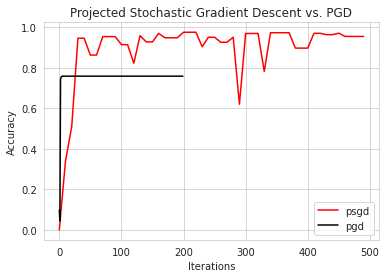

In [38]:
plt.plot(iterations_psgd, liss_psgd, color = 'red', label = 'psgd')
plt.plot(iterations, liss, color = 'black', label = 'pgd')
plt.legend(loc = 'best')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Projected Stochastic Gradient Descent vs. PGD');

Projected Stochastic Gradient Descent outperforms the non-stochastic version. It also has the advantage of very low computational time compared to deterministic PGD. However, as seen during the lectures, PSGD is a very noisy estimator, this can be observed through the high variations in the red curve. This does not prevent the algorithm from being very efficient and powerful. In what follows, stochastic Regularized Follow The Leader is implemented, using different regularization functions. As it will be illustrated, the obtained results are very satisfactory.

# 4. Regularized Follow the Leader

### 4.1 Stochastic Mirror Descent (SMD)

It corresponds to the quadratic regularization $R(x) = \mid \mid x - x1 \mid \mid^2$ where $x_1 \in \mathcal{K}$. Here is the algorithm:

In [39]:
def stoch_mirror_descent(a, b, cost, grad, epoch, lamda, eta, z):
    'Learning rate: eta = 1/sqrt(t)'

    y, x = np.zeros(a.shape[1]), np.zeros(a.shape[1])
    x_iter = np.zeros((a.shape[1], epoch))
    idx = np.random.randint(0, a.shape[0], epoch)
    a = a[idx,:]
    b = b[idx]
    for t in range(1,epoch):
        eta = 1 / np.sqrt(t)
        y -= eta * grad(x, a[t,:], b[t], lamda)
        x = projection_l1(y,z)
        x_iter[:,t] = x
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f

In [40]:
x_iter_smd, x_smd = stoch_mirror_descent(X_train, y_train, hinge_loss, inst_gradient, 5000, 0.001, 1, 1000)

In [41]:
liss_smd = []
iterations_smd = np.arange(0, 2500, 20)
for i in iterations_smd:
    tstt_smd = y_test * (X_test.dot(x_iter_smd[:,i]))
    liss_smd.append(tstt_smd[tstt_smd>0].shape[0]/y_test.shape[0])

In [42]:
liss_psgd = []
iterations_psgd = np.arange(0,2500, 20)
for i in iterations_psgd:
    tstt_psgd = y_test * (X_test.dot(x_iter_psgd[:,i]))
    liss_psgd.append(tstt_psgd[tstt_psgd>0].shape[0]/y_test.shape[0])

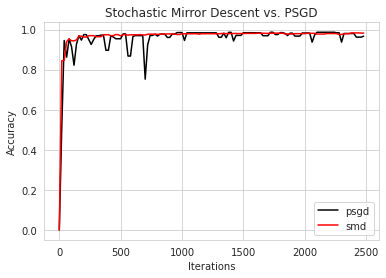

In [43]:
plt.plot(iterations_psgd, liss_psgd, color = 'black', label = 'psgd')
plt.plot(iterations_smd, liss_smd, color = 'red', label = 'smd')
plt.legend(loc = 'best')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Stochastic Mirror Descent vs. PSGD');

As the above figure suggests, SMD achieves better performance in fewer iterations. It is also less noisy the PSGD. Both algorithms perform very well and achieve more than $95\%$ accuracy, which shows once again the efficiency of stochastic algorithms. 

Next, we introduce a new regularization function, that leads to the Exponentiated Gradient Algorithm.

### 4.2 Stochastic Exponentiated Gradient (EG +/-)

This algorithm also falls into the RFTL category. It uses the following regularization function, called \textit{Negative Entropy}:
\begin{equation*}
R(x) = x^Tlog(x)
\end{equation*}

Below, the algorithm is implemented, in its stochastic version:

In [44]:
def stoch_exp_grad(a, b, cost, grad, epoch, lamda, eta, z):
  
    # Initializations
    d = a.shape[1]
    x, y, w = np.zeros(d), np.zeros(2*d), 1/(2*d) * np.ones(2*d)
    x_iter = np.zeros((d, epoch))
  
    # Random sampling
    idx = np.random.randint(0, a.shape[0], epoch)
    a = a[idx,:]
    b = b[idx]

    # Recursion
    for t in range(1, epoch):
        eta = np.sqrt(np.log(2*d) / t)
        y[:d] -= eta * grad(x, a[t,:], b[t], lamda)
        y[d:] += eta * grad(x, a[t,:], b[t], lamda)
        w = np.exp(y) / np.sum(np.exp(y))
        x = z * (w[:d] - w[d:])
        x_iter[:,t] = x
  
    # Return
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f

In [45]:
x_iter_seg, x_seg = stoch_exp_grad(X_train, y_train, hinge_loss, inst_gradient, 50000, 0.1, 1, 10)

In [46]:
liss_seg = []
iterations_seg = np.arange(0, 2500, 10)
for i in iterations_seg:
    tstt_seg = y_test * X_test.dot(x_iter_seg[:,i])
    liss_seg.append(tstt_seg[tstt_seg>0].shape[0]/y_test.shape[0])

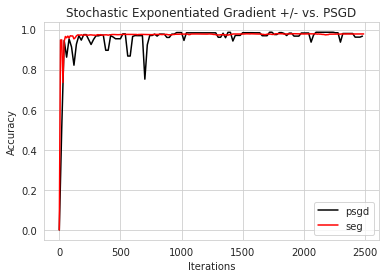

In [47]:
plt.plot(iterations_psgd, liss_psgd, color = 'black', label = 'psgd')
plt.plot(iterations_seg, liss_seg, color = 'red', label = 'seg')
plt.legend(loc = 'best')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Stochastic Exponentiated Gradient +/- vs. PSGD');

SEG +/- performs as well as PSGD. However, it has an exploratory phase, at around 100 iterations. This algorithm is not noisy and achieves very high accuracy, in few iterations and thus very low computational time, which is, once again, the biggest advantage of stochastic algorithms.

In next section, we introduce an accelerated OCO algorithm, using momentum.  

### 4.3 Stochastic Adagrad

Stochastic Adagrad contains a projection step, which uses a weighted norm instead of the the $l^1$ norm. In order to implement the algorithm, this projection has to be implemented. 

#### Projection on the Simplex with Weighted norm $D$

In [48]:
def projection_simplex_weighted(x, w, z):
    if np.sum(np.abs(x)) > z:
        v = np.abs(x * w)
        u = np.argsort(-v)
        sx = np.cumsum(np.abs(x)[u])
        sw = np.cumsum(1/w[u])
        cond = v[u] > (sx-z) / sw
        rho = cond[cond == True].shape[0] - 1
        theta = (sx[rho] - z) / sw[rho]
        x = np.sign(x) * np.maximum(abs(x) - theta/w, 0)
    return x

#### Stochastic Adagrad Algorithm

Stochastic Adagrad restricts the $R$ to weighted quadratic regularization functions $R \in \mathcal{H}$ satisfying:
\begin{equation*}
\forall x \in \mathcal{K} : \nabla^2R(x)  = D = Diag(s)
\end{equation*}
where $s \in \mathbf{R}_{+}^d, \| s\| \leq 1$.

Adagrad is an agile OMD with multiple adaptive learning rates. The algorithm is implemented below, in its stochastic version:

In [49]:
def stoch_Adagrad(a, b, cost, grad, epoch, lamda, z):
    'The step s is adaptive and learned wrt the'
    'gradient value'

    # Initializations
    d = a.shape[1]
    x, y, s = np.zeros(d), np.zeros(d), 1e-3 * np.ones(d)
    x_iter = np.zeros((d, epoch))

    # Random sampling
    idx = np.random.randint(0, a.shape[0], epoch)
    a = a[idx,:]
    b = b[idx]

    # Recursion
    for t in range(1, epoch):
        s = s + inst_gradient(x, a[t,:], b[t], lamda)**2
        D = np.sqrt(s)
        y = x - 1/D * inst_gradient(x, a[t,:], b[t], lamda)
        x = projection_simplex_weighted(y, D, z)
        x_iter[:,t] = x
  
    # Return
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f, D

In [50]:
x_iter_ada, x_ada, D = stoch_Adagrad(X_train, y_train, 
                                     hinge_loss, inst_gradient, 
                                     10000, 0.001, 1e7)

In [51]:
liss_ada = []
iterations_ada = np.arange(0, 500,10)
for i in iterations_ada:
    tstt_ada = y_test * X_test.dot(x_iter_ada[:,i])
    liss_ada.append(tstt_ada[tstt_ada>0].shape[0]/y_test.shape[0])

In [52]:
liss_psgd = []
iterations_psgd = np.arange(0,500, 10)
for i in iterations_psgd:
    tstt_psgd = y_test * (X_test.dot(x_iter_psgd[:,i]))
    liss_psgd.append(tstt_psgd[tstt_psgd>0].shape[0]/y_test.shape[0])

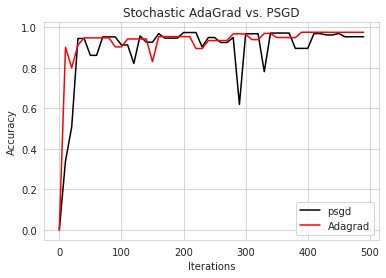

In [53]:
plt.plot(iterations_psgd[:1500], liss_psgd[:1500], color = 'black', label = 'psgd')
plt.plot(iterations_ada, liss_ada, color = 'red', label = 'Adagrad')
plt.legend(loc = 'best')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Stochastic AdaGrad vs. PSGD');

The above figure suggests that AdaGrad achieves very quickly $95\%$ accuracy. This is due to the adaptive character that allows further steps in the 'right' directions. This algorithm can be accelerated by the use of momentum, to obtain the famous Adam algorithm (see section 8). Another acceleration method, using second oreder moments will is presented in next section. 

# 5. Stochastic Online Newton Step 

In [54]:
def Online_Newton_Step(a, b, cost, grad, epoch, gamma, lamda, z):
    # Initializations
    d = a.shape[1]
    gamma = 1
    x, y = np.zeros(d), np.zeros(d), 
    A, invA = 1/gamma**2 * np.eye(d), gamma**2 * np.eye(d)
    x_iter = np.zeros((d, epoch))
    
    # Random sampling
    idx = np.random.randint(0, a.shape[0], epoch)
    a = a[idx,:]
    b = b[idx]
    
    # Recursion
    for t in range(1, epoch):
        gradi = grad(x, a[t,:], b[t], lamda)
        A += gradi.dot(gradi.T)
        invA = invA - 1/(1 + gradi.T.dot(invA).dot(gradi))
        y = x - 1/gamma * invA.dot(gradi)
        x = projection_simplex_weighted(y, np.diag(A), z)
        x_iter[:,t] = x
        
    # Return
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f

In [118]:
x_iter_ons, x_ons = Online_Newton_Step(X_train, y_train, 
                                       hinge_loss, inst_gradient,
                                       1000, 0.6, 
                                       0.33, 1)

In [119]:
liss_ons = []
iterations_ons = np.arange(0, 500,10)
for i in iterations_ons:
    tstt_ons = y_test * X_test.dot(x_iter_ons[:,i])
    liss_ons.append(tstt_ons[tstt_ons>0].shape[0]/y_test.shape[0])

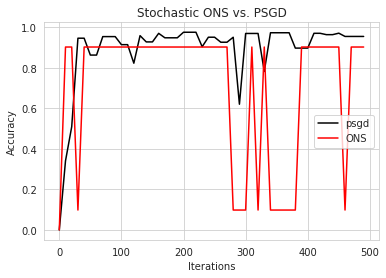

In [120]:
plt.plot(iterations_psgd, liss_psgd, color = 'black', label = 'psgd')
plt.plot(iterations_ons, liss_ons, color = 'red', label = 'ONS')
plt.legend(loc = 'best')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Stochastic ONS vs. PSGD');

Stochastic ONS is a hard to set algorithm, the choice of the parameter $\gamma$ and of the regularization $\lambda$ is very delicate. What is represented in the figure is the best performance we could get after trying different combinations between parameters.

In addition, running time is greater for this algorithm compared to first order methods, which makes us more in favour of using gradient-based methods instead of ONS.

# 6. Incomplete Information Methods
These methods fall into the exploration category, very useful in extremely high dimensions.

### 6.1 Stochastic Randomized Exponentiated Gradient +/- Algorithm

In [58]:
def stoch_random_exp_grad(a, b, cost, grad, epoch, lamda, eta, z):
    # Initializations
    d = a.shape[1]
    x, w = np.zeros(d), 1/(2*d)*np.ones(2*d)
    x_iter = np.zeros((d, epoch))
  
   # Random sampling
    idx = np.random.randint(0, a.shape[0], epoch)
    a = a[idx,:]
    b = b[idx]
    
    # Recursion
    for t in range(1, epoch):
        it = np.random.randint(1,d,(w[:d]+w[d:])/2.)
        eta = np.sqrt(np.log(2*d)/(2*d*t))
        if grad(x, a[t,:], b[t], lamda)[it]>0:
            w[it] = np.exp(-eta*grad(x, a[t,:], b[t], lamda)[it]/w[it])
        else:
            w[it+d] = np.exp(eta*grad(x, a[t,:], b[t], lamda)[it]/w[it])
        w = w / np.sum(w)
        x = z*(w[:d]-w[d:])
        x_iter[:,t] = x
  
    # Return
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f

# 7. Efficient Mini-batch Training for Stochastic Optimization *(Li and al., 2014)* 

This algorithm originated from the work of (Li and al., 2014). It falls into the category of Stochastic Gradient Descent and uses mini-batch to update the gradient at each step. 

The main motivation arises from the necessity of using mini-batch in large-scale optimization such as in Deep Learning, Natural Language Processing or Image Classification. Increasing the mini-batch size results in a decrease in in the convergence rate, which is limiting since larger mini-batches are more compatible with parallelization. 

The article suggests a method that enables the use of a larger mini-batch without affecting the convergence rate. 

The main theoretical result is the following: 

---
**Theorem**

*Consider the stochastic update rule suggested by (6) in the article. Assume that $\phi_i$ is $\lambda $-strongly convex for all $i$. Under Assumption 1 (cf. original article) and when choosing the update parameter $\gamma_t = \gamma + \lambda (t−1)$, we have the following regret bound, for all $w^* \in \Omega$:*
\begin{equation}
\sum_{t=1}^T \mathbf{E}[\phi(w_t) - \phi(w^*)] \leq \frac{\gamma}{2} \| w^* - w_0\|_2^2 + \frac{A^2}{b} \sum_{t=1}^T \frac{1}{\gamma_t}
\end{equation}
where $b$ is the mini-batch size and $A^2 = sup_{w \in \Omega} n^{-1} \sum_{i=1}^n \| \nabla \phi_i(w) - \nabla \phi(w) \|_2^2$.

---
This yields to an aggregate regret bound of $1/\sqrt{bT}$ in the case of convex loss function, which is the case of penalized linear SVM. For a detailed proof of the theorem, see (Li and al., 2014). Here, we are interested more in the computational aspect.

The algorithm is implemented below, in our case, no parallelization has been performed, so high computational time was required to achieve convergence.

The algorithm aggregates the parallel steps $x_t$ obtained by each 'machine'. the final update of a gradient step is the mean of the steps obtained by each machine. 

7.1 describes the update that is performed by each machine. This algorithm is then used to obtain the final update, given in 7.2. 


### 7.1. EMSO-GD Algorithm

In [59]:
def emso_gd(x, mini_a, mini_b, gamma, grad, eta, L, lamda):
    x_t = x
    for l in range(L):
        x_t = x_t - eta * (grad(x, mini_a, mini_b, lamda) + gamma * (x_t - x))
        x = x_t
    return x_t

### 7.2. EMSO Algorithm

In [60]:
def emso(x, a, b, gamma, m,d, T, grad, eta, L, lamda):
    
    Ia, Ib = np.split(a, m), np.split(b, m)  # Partition into m mini-batches
    x_iter = np.zeros((a.shape[1], T))


    for t in range(T):
        idx = np.random.randint(0,m)
        mini_a, mini_b = Ia[idx], Ib[idx]     # Randomly choose mini-batch I_t
        mini_a_i, mini_b_i = np.split(mini_a, d), np.split(mini_b, d)     # Partition I_t into I_t1,...,I_td
        
        store_xti = np.zeros((a.shape[1], d))
        for i in range(d):
            x_ti = emso_gd(x, mini_a_i[i], mini_b_i[i], gamma+t-1 , gradient, eta, L, lamda)
            store_xti[:,i] = x_ti
        x = store_xti.mean(axis = 1)
        x_iter[:,t] = x
    return x, x_iter

In [61]:
x_emso, x_iter_emso = emso(np.ones(X_train.shape[1]), X_train, y_train, 
                           0.1, 200, 
                           10, 2000, 
                           gradient, 
                           0.02, 10, 0.01)

In [62]:
liss_emso = []
iterations_emso = np.arange(0, 1000, 1)
for i in iterations_emso:
    tstt_emso = y_test * X_test.dot(x_iter_emso[:,i])
    liss_emso.append(tstt_emso[tstt_emso>0].shape[0]/y_test.shape[0])

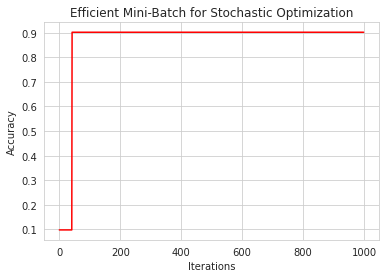

In [63]:
plt.plot(iterations_emso, liss_emso, color = 'red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Efficient Mini-Batch for Stochastic Optimization');

One should notice that the first iterations do not bring significant update. Then, at around 50 iterations, the algorithm achieves $90\%$ accuracy but remains at this point and does not improve more. Compared with the above seen algorithms, we obtain the following figure: 

In [64]:
# EMSO
liss_emso = []
iterations_emso = np.arange(0, 500, 10)
for i in iterations_emso:
    tstt_emso = y_test * X_test.dot(x_iter_emso[:,i])
    liss_emso.append(tstt_emso[tstt_emso>0].shape[0]/y_test.shape[0])

#AdaGrad
liss_ada = []
iterations_ada = np.arange(0, 500,10)
for i in iterations_ada:
    tstt_ada = y_test * X_test.dot(x_iter_ada[:,i])
    liss_ada.append(tstt_ada[tstt_ada>0].shape[0]/y_test.shape[0])

#PSGD
liss_psgd = []
iterations_psgd = np.arange(0,500, 10)
for i in iterations_psgd:
    tstt_psgd = y_test * (X_test.dot(x_iter_psgd[:,i]))
    liss_psgd.append(tstt_psgd[tstt_psgd>0].shape[0]/y_test.shape[0])

# SEG
liss_seg = []
iterations_seg = np.arange(0, 500, 10)
for i in iterations_seg:
    tstt_seg = y_test * X_test.dot(x_iter_seg[:,i])
    liss_seg.append(tstt_seg[tstt_seg>0].shape[0]/y_test.shape[0])

# SMD
liss_smd = []
iterations_smd = np.arange(0, 500, 10)
for i in iterations_smd:
    tstt_smd = y_test * (X_test.dot(x_iter_smd[:,i]))
    liss_smd.append(tstt_smd[tstt_smd>0].shape[0]/y_test.shape[0])

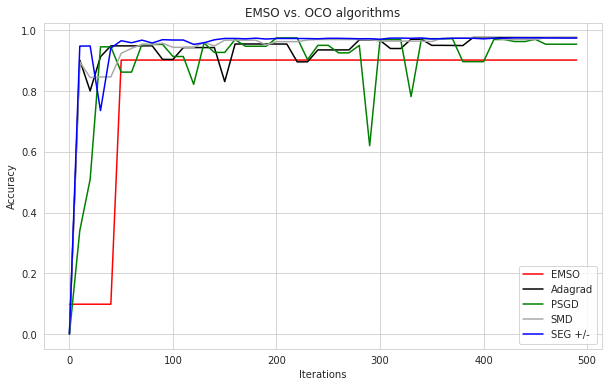

In [65]:
plt.figure(figsize = (10,6))

plt.plot(iterations_emso, liss_emso, color = 'red', label = 'EMSO')
plt.plot(iterations_ada, liss_ada, color = 'black', label = 'Adagrad')
plt.plot(iterations_psgd, liss_psgd, color = 'green', label = 'PSGD')
plt.plot(iterations_smd, liss_smd, color = 'darkgrey', label = 'SMD')
plt.plot(iterations_seg, liss_seg, color = 'blue', label = 'SEG +/-')

plt.legend(loc = 'best')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('EMSO vs. OCO algorithms');

The performance achieved bye EMSO is lower than the ones obtained by the preceding OCO algorithms, since it remains 'locked' in a $90\%$ accuracy.

# 8. Bonus: Adam algorithm

In [17]:
def adam(a, b, cost, grad, lamda, epoch, z, beta1 = 0.9, beta2 = 0.999):
    # Initializations
    d = a.shape[1]
    eta = 1
    x, y, s, m = np.zeros(d), np.zeros(d), 1e-4 * np.ones(d), 5
    x_iter = np.zeros((d, epoch))

    # Random sampling
    idx = np.random.randint(0, a.shape[0], epoch)
    a = a[idx,:]
    b = b[idx]

    # Recursion
    for t in range(1, epoch):
        eta /= np.sqrt(t)
        m = beta1*m + (1-beta1)*inst_gradient(x, a[t,:], b[t], lamda)
        s = beta2*s + (1-beta2)*inst_gradient(x, a[t,:], b[t], lamda)**2
        D = np.sqrt(s)
        y = x - eta/D * m
        x = projection_simplex_weighted(y, D, z)
        x_iter[:,t] = x

    # Return
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f

In [67]:
x_iter_adam, x_adam = adam(X_train, y_train, 
                              hinge_loss, inst_gradient, 
                              0.001, 10000, 1e3)

In [282]:
def Adam(X, y, loss, grad, lamda, epoch, lr = .001, beta1 = .9, beta2 = .9999, eps = 1e-8):
    d = X.shape[1]

    # Initializations
    theta_iter = np.zeros((d,epoch))
    theta, cost = np.random.randn(d), np.zeros(epoch)
    init  = theta
    cost[0] = hinge_loss(init, X_train, y_train, lamda)
    m, v = np.zeros(d), np.zeros(d)
    
    # Random sampling
    idx = np.random.randint(0, X.shape[0], epoch)
    X = X[idx,:]
    y = y[idx]
    
    # Recursion
    for t in range(1, epoch):
        #lr /= np.sqrt(t)
        
        # Update biased moments
        m = beta1*m + (1-beta1)*inst_gradient(theta, X[t,:], y[t], lamda)
        v = beta2*v + (1-beta2)*inst_gradient(theta, X[t,:], y[t], lamda)**2
        
        # Compute unbiased moments 
        hat_m = m / (1 - beta1**t)
        hat_v = v / (1 - beta2**t)
    
        # Update parameters
        theta = theta - lr*hat_m / (np.sqrt(hat_v) + eps)
        theta_iter[:,t] = theta
        
        # Compute cost function
        cost[t] = hinge_loss(theta, X, y, lamda)

    return theta_iter, theta, cost, init, X, y

In [283]:
def stoch_gradient_descent(a, b , cost, grad, epoch, lamda, eta):
    'epoch = T: number of iterations'
    'eta = 1 / (lamda*t)'

    x = init
    cost = np.zeros(epoch)
    cost[0] = hinge_loss(x, a, b, lamda)
    a = X_sample
    b = y_sample 
    x_iter = np.zeros((a.shape[1], epoch+1))
    for t in range(1,epoch):
        eta = 1 / (lamda * t)
        x -= eta * grad(x, a[t,:], b[t], lamda)
        x_iter[:,t] = x
        
        cost[t] = hinge_loss(x, a, b, lamda)
    x_f = x_iter.mean(axis = 1)
    return x_iter, x_f, cost

In [293]:
%config InlineBackend.figure_format = 'retina'

# Parameters
epochs = 5000
alpha = 0.01
lamda = 0.001

In [294]:
theta_iter, theta_f, cost_adam, init, X_sample, y_sample = Adam(X_train, y_train,
                                                                hinge_loss, inst_gradient,
                                                                lamda = lamda, epoch = epochs,
                                                                lr = alpha)

In [295]:
x_iter_sgd, x_sgd, cost_sgd = stoch_gradient_descent(X_train, y_train, 
                                                    hinge_loss, inst_gradient, 
                                                    epochs, lamda, alpha)

In [296]:
liss_adam, liss_cost_adam = [], []
iterations_adam = np.arange(0, epochs,20)
for i in iterations_adam:
    tstt_adam = y_test * X_test.dot(theta_iter[:,i])
    liss_adam.append(tstt_adam[tstt_adam>0].shape[0]/y_test.shape[0])
    liss_cost_adam.append(cost_adam[i])

In [297]:
liss_sgd, liss_cost_sgd = [], []
iterations_sgd = np.arange(0,epochs, 20)
for i in iterations_sgd:
    tstt_sgd = y_test * (X_test.dot(x_iter_sgd[:,i]))
    liss_sgd.append(tstt_sgd[tstt_sgd>0].shape[0]/y_test.shape[0])
    liss_cost_sgd.append(cost_sgd[i])

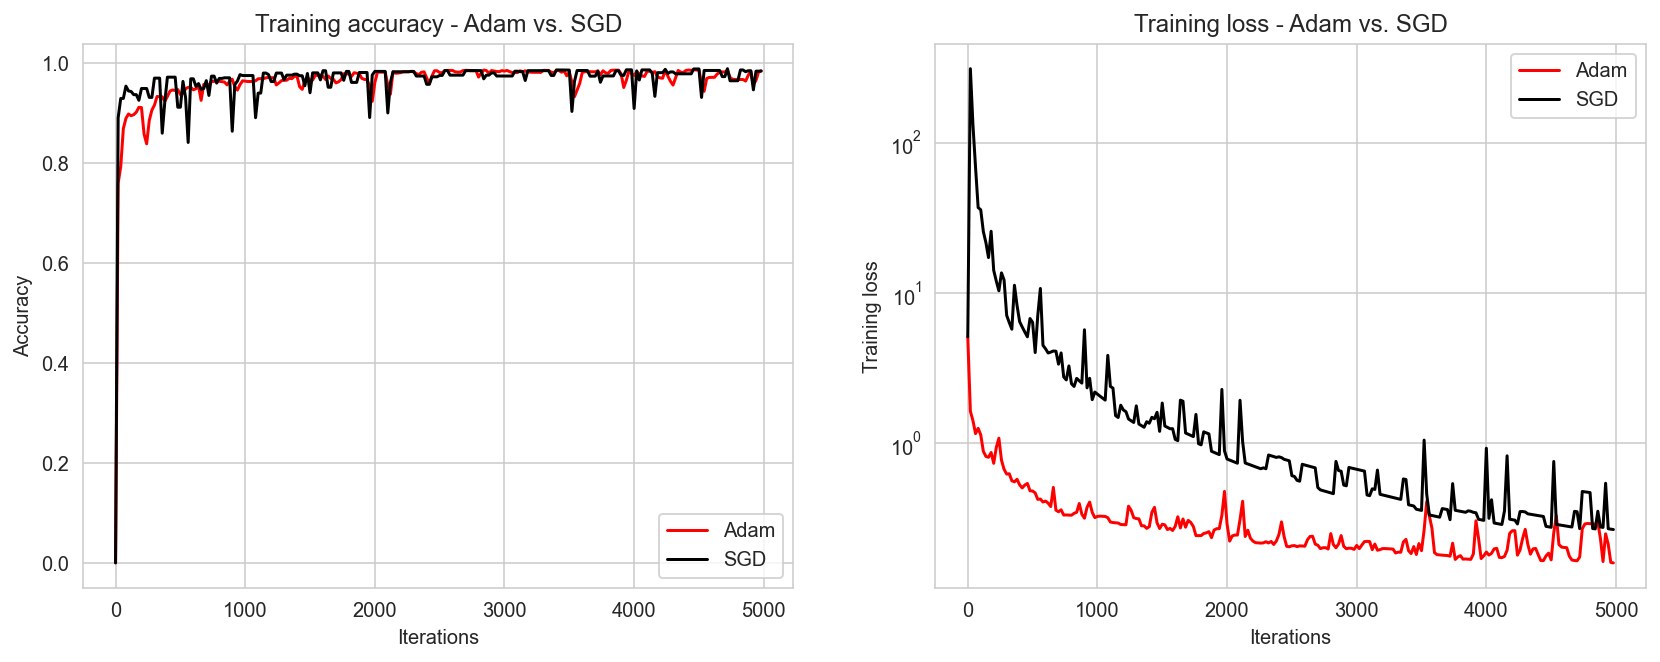

In [298]:
fig = plt.figure(figsize = (14,5))

# Accuracy
plt.subplot(121)
plt.plot(iterations_adam, liss_adam, color = 'red', label = 'Adam')
plt.plot(iterations_sgd, liss_sgd, color = 'black', label = 'SGD')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training accuracy - Adam vs. SGD');


# Cost function
plt.subplot(122)
plt.plot(iterations_adam, liss_cost_adam, color = 'red', label = 'Adam')
plt.plot(iterations_sgd, liss_cost_sgd, color = 'black', label = 'SGD')
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Training loss')
plt.title('Training loss - Adam vs. SGD');

plt.savefig('fig.jpg')